# Practica 06: Preparacion de Datos para su Análisis (ETL)


Ingenieria Desarrollo y Gestion de Software

Realizado por: **Jareni Gomez Juan** - 220336

## 1. Importacion de las librerias y Paquetes a utilizar para el analisis de datos.

In [3]:
## Importacion de librerias
import numpy as np
import pandas as pd 
import time 

##Graficadores
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


## 2. Ubicacion del origen de Datos

In [4]:

%cd "C:/Users/jaren/OneDrive/Escritorio/Practica6"





C:\Users\jaren\OneDrive\Escritorio\Practica6


## 3. Construccion y consulta del Dataframe

In [6]:
df = pd.read_csv('salaries.csv')



In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73156 entries, 0 to 73155
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73155 non-null  float64
 1   experience_level    73154 non-null  object 
 2   employment_type     73154 non-null  object 
 3   job_title           73155 non-null  object 
 4   salary              73154 non-null  float64
 5   salary_currency     73154 non-null  object 
 6   salary_in_usd       73155 non-null  float64
 7   employee_residence  73154 non-null  object 
 8   remote_ratio        73154 non-null  float64
 9   company_location    73154 non-null  object 
 10  company_size        73155 non-null  object 
dtypes: float64(4), object(7)
memory usage: 6.1+ MB


In [8]:
# Print de numero de celdas
df.size


804716

In [9]:
# Print de numero de filas/registros
print(len(df))

73156


Consultas sobre el dataframe

In [11]:
df.head() ## Devuelve los primeros y los ultimos 5 registros o tuplas del dataFrame

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
1,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
2,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
3,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
4,2025.0,SE,FT,Engineer,143000.0,USD,143000.0,US,0.0,US,M


In [13]:
df.tail() ## Devuelve los ultimos datos del DataFrame, si no se especifica cuantos, automaticamente devuelve los ultimos 5





,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
73151,NaN,NaN,CT,fjfjf dd,949944.0,USD,393993.0,US,100.0,MT,S
73152,3939.0,NN,CT,kfjdf,393993.0,INR,29292.0,SS,100.0,MT,F
73153,3383.0,SE,CT,Jjsjud,20303.0,USD,39330.0,SS,100.0,IN,S
73154,2838.0,EN,FT,Data sjsj,203003.0,INR,39399.0,IN,20.0,US,L
73155,2828.0,NN,DD,Bussines sks,83883.0,INR,93993.0,IN,10.0,US,L


Busqueda de Nulos

In [14]:
df.isnull() #Mapeo la matriz original con una Matriz Boolean en busqueda de elementos nulos

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
73151,True,True,False,False,False,False,False,False,False,False,False
73152,False,False,False,False,False,False,False,False,False,False,False
73153,False,False,False,False,False,False,False,False,False,False,False
73154,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.notnull() #Realiza un mapeo de la matriz originla colocando valores booleanos de
             # acuerdo a la condicion de si es nulo 

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
73151,False,False,True,True,True,True,True,True,True,True,True
73152,True,True,True,True,True,True,True,True,True,True,True
73153,True,True,True,True,True,True,True,True,True,True,True
73154,True,True,True,True,True,True,True,True,True,True,True


## 4. Limpieza de Datos previo al análisis

In [16]:
df.describe() ## realiza un reporte estadistico sobre columnas completamente numericas (Cuantitativos)

,work_year,salary,salary_in_usd,remote_ratio
count,73155.000000,7.315400e+04,73155.000000,73154.000000
mean,2024.144091,1.625679e+05,158010.909384,21.586516
std,67.227725,1.925949e+05,72511.837397,41.024711
min,2020.000000,1.400000e+04,2992.000000,0.000000
25%,2024.000000,1.069525e+05,106880.000000,0.000000
50%,2024.000000,1.480000e+05,147500.000000,0.000000
75%,2024.000000,2.000000e+05,199700.000000,0.000000
max,20018.000000,3.040000e+07,800000.000000,100.000000


Elliminacion de datos duplicados

In [17]:
df_sinduplicados = df.drop_duplicates()

print("Tamaño del DF Original: ", len(df))
print("Tamaño del DF sin Duplicados: ", len(df_sinduplicados))
print("Registros/Tuplas eliminados: ",  len(df) - len(df_sinduplicados))



Tamaño del DF Original:  73156
Tamaño del DF sin Duplicados:  34032
Registros/Tuplas eliminados:  39124


**IMPORTANTE**: La eliminacion de duplicados debe realizarse con extremo cuidado, sobre todo con datos agrupados sin identificadores, por el riesgo de alterar resultados y tomar decisiones erradas 

Eliminar datos  registros con algun dato vacio en cualquier columna

In [18]:
df_sinvacios = df.dropna()

print("Tamaño del DF Original: ", len(df))
print("Tamaño del DF sin Vacios: ", len(df_sinvacios))
print("Registros/Tuplas eliminados: ",  len(df) - len(df_sinvacios))




Tamaño del DF Original:  73156
Tamaño del DF sin Vacios:  73153
Registros/Tuplas eliminados:  3


In [19]:
df.describe()



,work_year,salary,salary_in_usd,remote_ratio
count,73155.000000,7.315400e+04,73155.000000,73154.000000
mean,2024.144091,1.625679e+05,158010.909384,21.586516
std,67.227725,1.925949e+05,72511.837397,41.024711
min,2020.000000,1.400000e+04,2992.000000,0.000000
25%,2024.000000,1.069525e+05,106880.000000,0.000000
50%,2024.000000,1.480000e+05,147500.000000,0.000000
75%,2024.000000,2.000000e+05,199700.000000,0.000000
max,20018.000000,3.040000e+07,800000.000000,100.000000


In [20]:
df_sinsalario = df.dropna(subset=['salary'])

print("Tamaño del DF Original: ", len(df))
print("Tamaño del DF sin Vacios: ", len(df_sinsalario))
print("Registros/Tuplas eliminados: ",  len(df) - len(df_sinsalario))

Tamaño del DF Original:  73156
Tamaño del DF sin Vacios:  73154
Registros/Tuplas eliminados:  2


Reemplazar valores nulos con avlores especificos

In [21]:
df_valoresdeSalarioSustituido = df.fillna(value='N/A')

Verificamos los cambios

In [23]:
df_valoresdeSalarioSustituido

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
1,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
2,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
3,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
4,2025.0,SE,FT,Engineer,143000.0,USD,143000.0,US,0.0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
73151,N/A,N/A,CT,fjfjf dd,949944.0,USD,393993.0,US,100.0,MT,S
73152,3939.0,NN,CT,kfjdf,393993.0,INR,29292.0,SS,100.0,MT,F
73153,3383.0,SE,CT,Jjsjud,20303.0,USD,39330.0,SS,100.0,IN,S
73154,2838.0,EN,FT,Data sjsj,203003.0,INR,39399.0,IN,20.0,US,L


In [24]:
df_valoresdeSalarioSustituido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73156 entries, 0 to 73155
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           73156 non-null  object
 1   experience_level    73156 non-null  object
 2   employment_type     73156 non-null  object
 3   job_title           73156 non-null  object
 4   salary              73156 non-null  object
 5   salary_currency     73156 non-null  object
 6   salary_in_usd       73156 non-null  object
 7   employee_residence  73156 non-null  object
 8   remote_ratio        73156 non-null  object
 9   company_location    73156 non-null  object
 10  company_size        73156 non-null  object
dtypes: object(11)
memory usage: 6.1+ MB


In [25]:
df_valoresdeSalarioSustituido.describe()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,73156.0,73156,73156,73156,73156.0,73156,73156.0,73156,73156.0,73156,73156
unique,13.0,6,7,297,7101.0,26,7710.0,95,7.0,87,5
top,2024.0,SE,FT,Data Scientist,160000.0,USD,160000.0,US,0.0,US,M
freq,62228.0,42928,72809,11443,1437.0,69420,1426.0,65983,57220.0,66037,70536


In [26]:
df_valoresdeSalarioSustituido = df.fillna({'salary':0.0, 'salary_in_usd':0.0})

compruebas el nuevo cambio

In [27]:
df_valoresdeSalarioSustituido

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
1,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
2,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
3,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
4,2025.0,SE,FT,Engineer,143000.0,USD,143000.0,US,0.0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
73151,NaN,NaN,CT,fjfjf dd,949944.0,USD,393993.0,US,100.0,MT,S
73152,3939.0,NN,CT,kfjdf,393993.0,INR,29292.0,SS,100.0,MT,F
73153,3383.0,SE,CT,Jjsjud,20303.0,USD,39330.0,SS,100.0,IN,S
73154,2838.0,EN,FT,Data sjsj,203003.0,INR,39399.0,IN,20.0,US,L


In [28]:
df_valoresdeSalarioSustituido.describe()


,work_year,salary,salary_in_usd,remote_ratio
count,73155.000000,7.315600e+04,73156.000000,73154.000000
mean,2024.144091,1.625635e+05,158008.749467,21.586516
std,67.227725,1.925941e+05,72513.695112,41.024711
min,2020.000000,0.000000e+00,0.000000,0.000000
25%,2024.000000,1.069242e+05,106875.000000,0.000000
50%,2024.000000,1.480000e+05,147500.000000,0.000000
75%,2024.000000,2.000000e+05,199700.000000,0.000000
max,20018.000000,3.040000e+07,800000.000000,100.000000


Limpieza de valores erroneos

In [30]:
df['experience_level'].unique()

array(['SE', 'EN', 'MI', 'EX', 'NN', nan], dtype=object)

In [33]:
df['experience_level'].value_counts(dropna=False)

experience_level
SE     42928
MI     21851
EN      6878
EX      1494
NN         3
NaN        2
Name: count, dtype: int64

In [36]:
df = df[df['experience_level'].isin(['SE', 'EN', 'MI', 'EX'])]

In [38]:
df['experience_level'].unique()

array(['SE', 'EN', 'MI', 'EX'], dtype=object)

In [39]:
df['experience_level'].value_counts()


experience_level
SE    42928
MI    21851
EN     6878
EX     1494
Name: count, dtype: int64

## 5. Análisis Básico del DataFrame (Datos Estadísticos Generales)

Método que realiza un reporte de los valores estadisticos básicos (Media, Conteo, Mediana, Descripcion Estandar, Valor Maximo y Minimo y la concentracion de frecuencia de 25%, 50% y 75%)sobre los datos **Cuantitativos** excluyendo valores **Cualitativos**.

In [40]:
df.describe()



,work_year,salary,salary_in_usd,remote_ratio
count,73151.000000,7.315100e+04,73151.000000,73151.000000
mean,2023.860931,1.625551e+05,158008.385463,21.584531
std,5.877343,1.925747e+05,72504.737834,41.023481
min,2020.000000,1.400000e+04,2992.000000,0.000000
25%,2024.000000,1.069550e+05,106887.500000,0.000000
50%,2024.000000,1.480000e+05,147500.000000,0.000000
75%,2024.000000,2.000000e+05,199700.000000,0.000000
max,3383.000000,3.040000e+07,800000.000000,100.000000


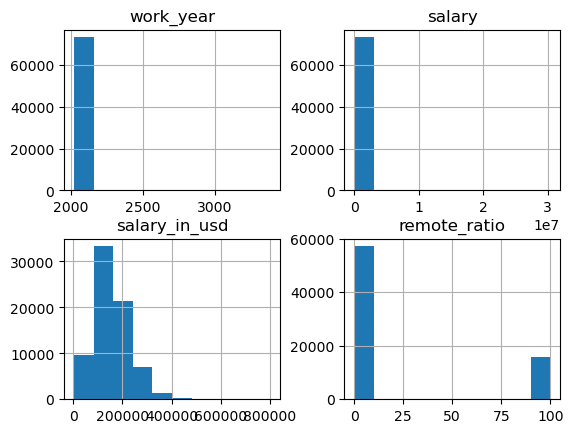

In [41]:
df.hist();

## 6. Definir criterios de analisis (Categories)

In [42]:
analysis_cryteria=['work_year','experience_level','employment_type','job_title',
                   'employee_residence', 'company_location', 'company_size']

## 7. Graficamos algo Basico

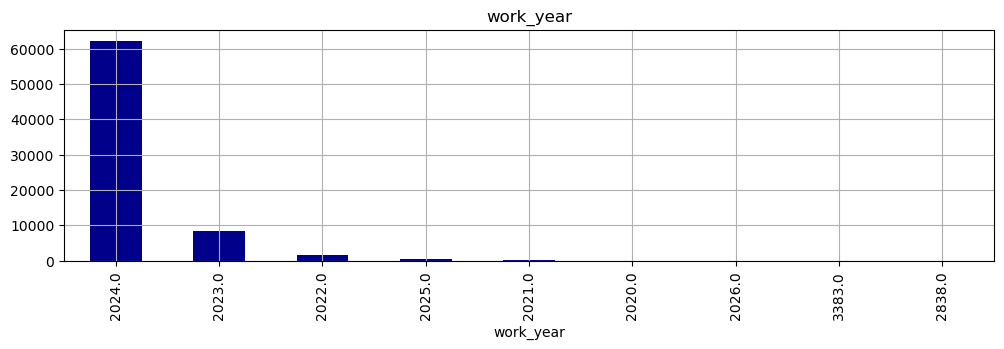

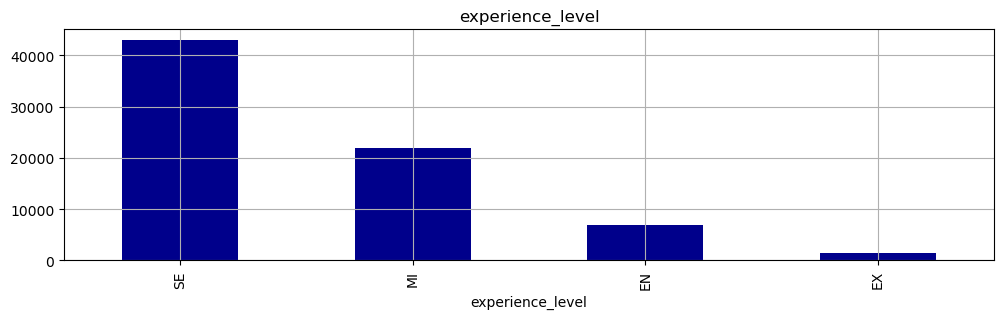

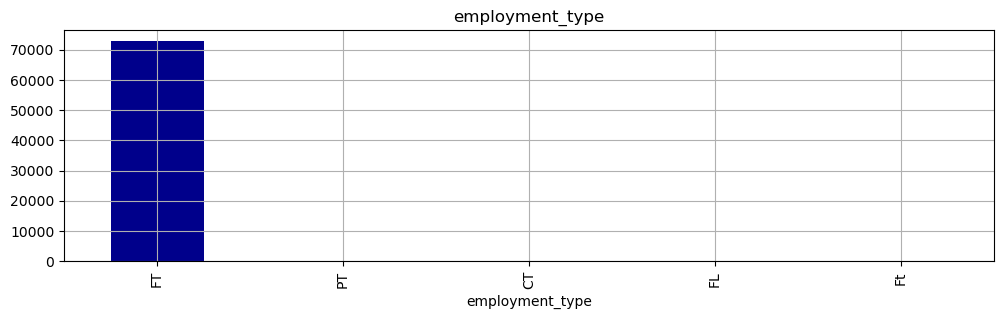

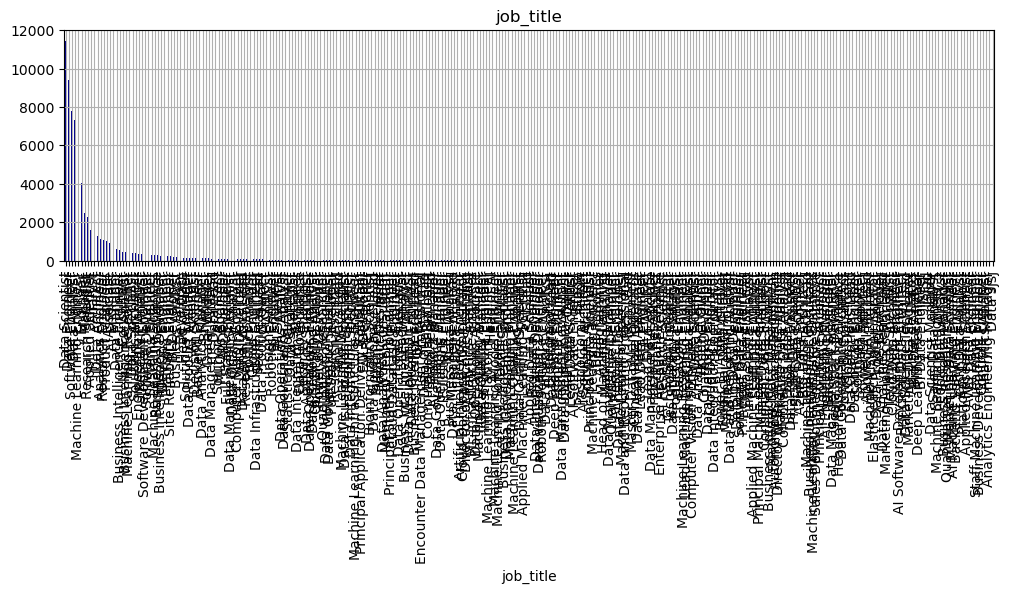

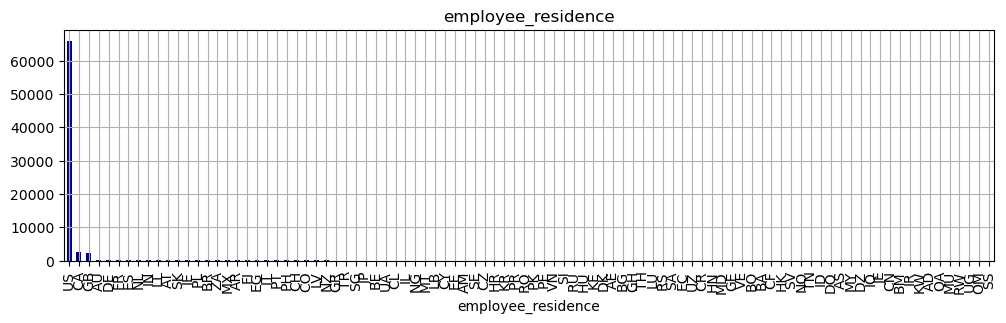

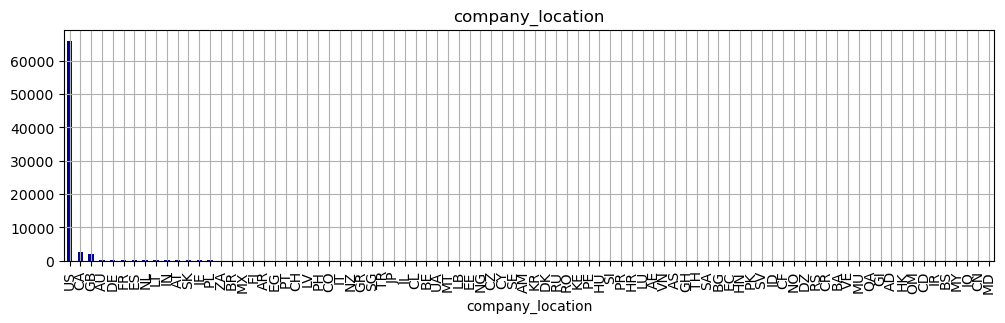

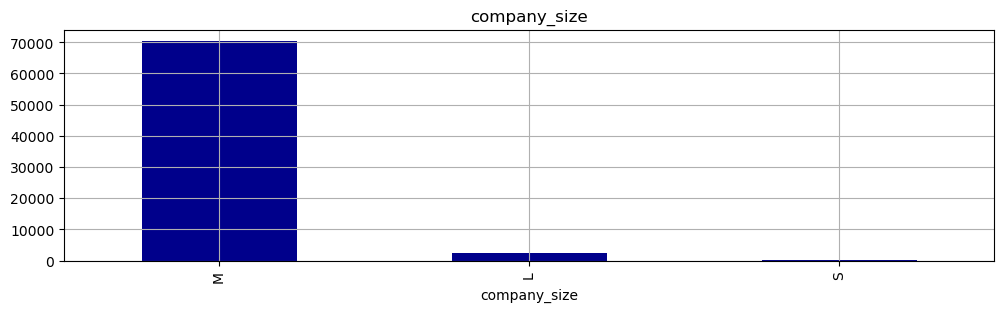

In [43]:
def_color = 'darkblue'
for f in analysis_cryteria:
    plt.figure(figsize=(12,3))
    df[f].value_counts().plot(kind='bar', color=def_color)
    plt.title(f)
    plt.grid()
    plt.show()

## 8. Limpiamos los datos para enfocarnos en los datos recolectados desde 2023, empleados de tiempo completo(Full time) en EU/US

In [44]:
# Creamos un subconjunto de la muetsra original

df_after2023 = df[(df.work_year>=2023)&(df.employment_type=='FT')&(df.company_location=='US')]
df_mex = df[(df.company_location=='MX')]


Revisamos los metadatos de la nueva entrada

In [45]:
df_after2023.info()
df_mex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64329 entries, 0 to 73154
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           64329 non-null  float64
 1   experience_level    64329 non-null  object 
 2   employment_type     64329 non-null  object 
 3   job_title           64329 non-null  object 
 4   salary              64329 non-null  float64
 5   salary_currency     64329 non-null  object 
 6   salary_in_usd       64329 non-null  float64
 7   employee_residence  64329 non-null  object 
 8   remote_ratio        64329 non-null  float64
 9   company_location    64329 non-null  object 
 10  company_size        64329 non-null  object 
dtypes: float64(4), object(7)
memory usage: 5.9+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 7842 to 72997
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   

In [46]:
df_after2023.size


707619

In [48]:
print(len(df_after2023))
print(len(df_mex))

64329
53


In [49]:
analysis_salary=['salary_in_usd']


C:\Users\jaren\AppData\Local\Temp\ipykernel_8068\3280321274.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after2023['salary_group'] = pd.cut(df_after2023[f], bins=bins,labels=labels, include_lowest=True)


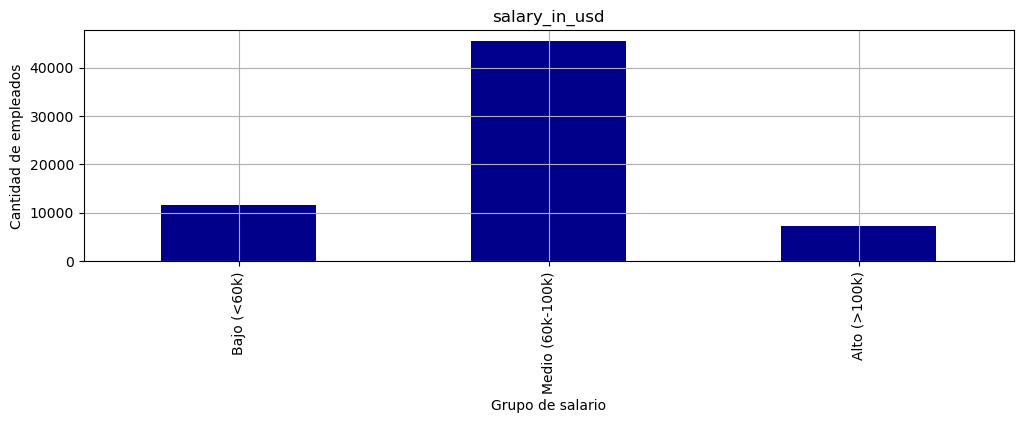

In [51]:
analysis_salary=['salary_in_usd']
def_color = 'darkblue'
for f in analysis_salary:
    plt.figure(figsize=(12,3))
    bins = [0, 100000, 250000, df_after2023[f].max()]
    labels = ['Bajo (<60k)', 'Medio (60k-100k)', 'Alto (>100k)']
    df_after2023['salary_group'] = pd.cut(df_after2023[f], bins=bins,labels=labels, include_lowest=True)
    df_after2023['salary_group'].value_counts().sort_index().plot(kind='bar', color=def_color)
    plt.title(f)
    plt.xlabel("Grupo de salario")
    plt.ylabel("Cantidad de empleados")
    plt.grid()
    plt.show()